In [2]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\MONSTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns

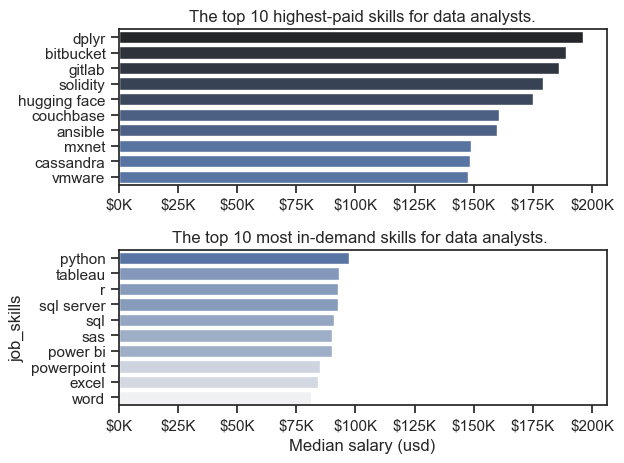

In [5]:
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US=df_DA_US.explode('job_skills')

df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay=df_DA_top_pay.head(10)

df_Da_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_Da_skills=df_Da_skills.head(10).sort_values(by='median',ascending=False)

fig,ax=plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot (kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('The top 10 highest-paid skills for data analysts.')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_Da_skills, x='median',y=df_Da_skills.index,ax=ax[1],hue='median',palette='light:b')
#df_Da_skills[::-1].plot(kind='barh',y='median',ax=ax[1])
ax[1].legend().remove()
ax[1].set_title('The top 10 most in-demand skills for data analysts. ')
ax[1].set_xlabel('Median salary (usd)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()